# Módulo 5: Modelo de evaluación y refinamiento

Hemos construido modelos y realizado predicciones de precios de vehículos. Ahora determinaremos cuán precisas son estas predicciones.

# Tabla de contenidos
* Evaluación modelo
* Ajuste excesivo, ajuste insuficiente y selección de modelo
* Regresión de cresta
* Búsqueda de cuadrícula

Importamos las librerias necesarias



In [1]:
import pandas as pd
import numpy as np
path = 'module_5_auto.csv'
df = pd.read_csv(path)


Primero solo usemos datos numéricos

In [2]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Bibliotecas para graficar

In [107]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

## Funciones para Graficar


In [108]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [109]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Parte 1: Entrenamiento y Pruebas
Un paso importante para probar su modelo es dividir sus datos en datos de Entrenamiento y prueba. Colocaremos el precio objetivo de los datos en un marco de datos separado y:

In [110]:
y_data = df['price']

en el eje de las x ponga todos los datos que coincidan con un dato en la columna precio.


In [111]:
x_data=df.drop('price',axis=1)

Ahora dividimos aleatoriamente nuestros datos en datos de entrenamiento y prueba usando la función `train_test_split.`

In [112]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("cantidad de muestras de prueba :", x_test.shape[0])
print("cantidad de muestras de entrenamiento:",x_train.shape[0])


cantidad de muestras de prueba : 31
cantidad de muestras de entrenamiento: 170


El parámetro test_size establece la proporción de datos que se divide en el conjunto de prueba. En lo anterior, el conjunto de pruebas se establece en el 10% del conjunto de datos total.

Ejercicio
Use la función `train_test_split` para dividir el conjunto de datos de modo que el 40% de las muestras de datos se utilizarán para la prueba, establezca el parámetro `random_state` igual a cero. El resultado de la función debe ser el siguiente: `x_train_1`, `x_test_1`, `y_train_1` y `y_test_1`.

In [113]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)


print("cantidad de muestras de prueba :", x_test1.shape[0])
print("cantidad de muestras de entrenamiento:",x_train1.shape[0])


cantidad de muestras de prueba : 81
cantidad de muestras de entrenamiento: 120


Importemos `LinearRegression` desde el módulo `linear_model`.

In [114]:
from sklearn.linear_model import LinearRegression

Creamos un objeto de regresión lineal

In [115]:
lre=LinearRegression()

ajustamos el modelo usando la característica de caballos de furerza

In [116]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculemos el R ^ 2 en los datos de prueba:

In [117]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

Podemos ver que R ^ 2 es mucho más pequeño usando los datos de prueba.(asi esta en la guía de edx)

In [118]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

Ejercicio
Encuentre el R ^ 2 en los datos de la prueba usando el 90% de los datos para los datos de entrenamiento

In [119]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)


0.7340722810055448

> A veces no tiene suficientes datos de prueba; Como resultado, es posible que desee realizar una validación cruzada. Repasemos varios métodos que puede usar para la validación cruzada.

## Puntuación de validación cruzada
Permite `importar model_selection` del módulo `cross_val_score.`

In [120]:
from sklearn.model_selection import cross_val_score

Ingresamos el objeto, la característica en este caso `caballos de fuerza`, los datos de destino (y_data). El parámetro `cv` determina el número de pliegues; en este caso 4

In [121]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

La puntuación predeterminada es R ^ 2; cada elemento en la matriz tiene el valor R ^ 2 promedio en el pliegue:

In [122]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Podemos calcular el promedio y la desviación estándar de nuestra estimación:

In [123]:
print("La media de los pliegues son", Rcross.mean(), "y la desviación estándar es" , Rcross.std())

La media de los pliegues son 0.522009915042119 y la desviación estándar es 0.291183944475603


Podemos utilizar el error al cuadrado negativo como una puntuación configurando la métrica del parámetro `puntuación` en `neg_mean_squared_error`.

In [124]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')
#No me quedo bien claro esta parte

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

Ejercicio
Calcule el R ^ 2 promedio usando dos pliegues, encuentre el R ^ 2 promedio para el segundo pliegue utilizando la potencia como característica:

In [125]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

También puede usar la función `cross_val_predict` para predecir el resultado. La función divide los datos en el número especificado de pliegues, utilizando un pliegue para obtener una predicción, mientras que el resto de los pliegues se utilizan como datos de prueba. Primero importe la función:

In [126]:
from sklearn.model_selection import cross_val_predict

Ingresamos el objeto, la característica en este caso `caballos de fuerza`, los datos de destino y_data. El parámetro `cv` determina el número de pliegues; en este caso 4. Podemos producir una salida:

In [127]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Parte 2: Overfitting, Underfitting y Model Selection
Resulta que los datos de prueba a veces denominados datos fuera de muestra son una medida mucho mejor de qué tan bien se desempeña su modelo en el mundo real. Una razón para esto es el sobreajuste; repasemos algunos ejemplos. Resulta que estas diferencias son más evidentes en la regresión lineal múltiple y la regresión polinómica, por lo que exploraremos el sobreajuste en ese contexto.

Creemos objetos de regresión lineal múltiple y entrenemos el modelo usando `caballos de fuerza`, `peso en vacío`, `tamaño del motor` y `mpg en carretera` como características.


In [128]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Predicción utilizando datos de entrenamiento

In [129]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Predicción utilizando datos de prueba:

In [130]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

Realicemos una evaluación del modelo utilizando nuestros datos de capacitación y prueba por separado. Primero importamos la biblioteca seaborn y matplotlibb para trazar.

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

Examinemos la distribución de los valores pronosticados de los datos de entrenamiento.

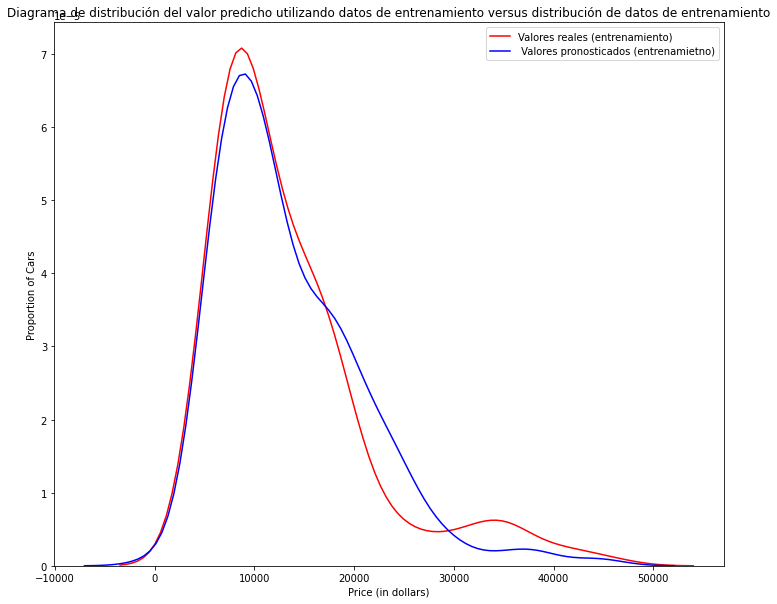

In [132]:
Title = 'Diagrama de distribución del valor predicho utilizando datos de entrenamiento versus distribución de datos de entrenamiento'
DistributionPlot(y_train, yhat_train, "Valores reales (entrenamiento) "," Valores pronosticados (entrenamietno)", Title)

Figura 1: Gráfico de los valores pronosticados utilizando los datos de entrenamiento en comparación con los datos de entrenamiento.

Hasta ahora, el modelo parece estar bien aprendiendo del conjunto de datos de entrenamiento. Pero, ¿qué sucede cuando el modelo encuentra nuevos datos del conjunto de datos de prueba? Cuando el modelo genera nuevos valores a partir de los datos de prueba, vemos que la distribución de los valores pronosticados es muy diferente de los valores objetivo reales.

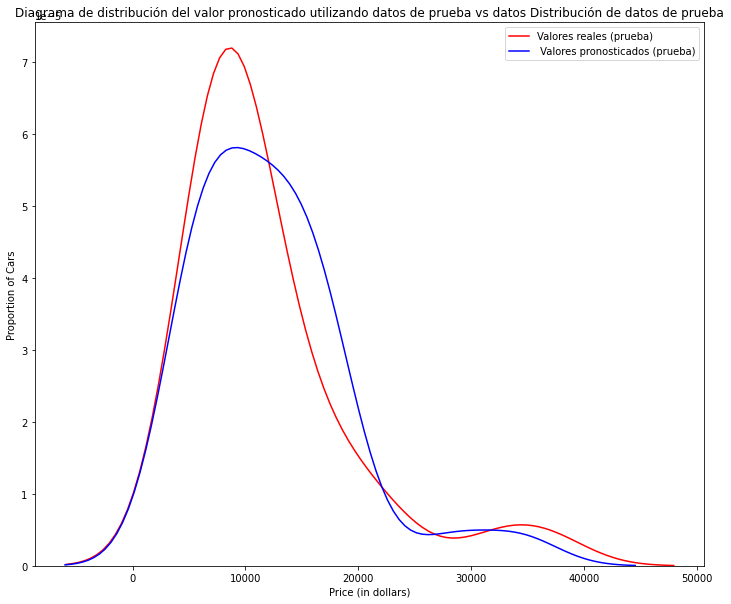

In [133]:
Title='Diagrama de distribución del valor pronosticado utilizando datos de prueba vs datos Distribución de datos de prueba'
DistributionPlot(y_test,yhat_test,"Valores reales (prueba) "," Valores pronosticados (prueba)",Title)

Figura 2: Gráfico del valor predicho utilizando los datos de prueba en comparación con los datos de prueba.

Comparando la Figura 1 y la Figura 2; Es evidente que la distribución de los datos de prueba en la Figura 1 es mucho mejor para ajustar los datos. Esta diferencia en la Figura 2 es evidente cuando los rangos son de 5000 a 15 000. Aquí es donde la forma de distribución es excepcionalmente diferente. Veamos si la regresión polinómica también exhibe una caída en la precisión de la predicción al analizar el conjunto de datos de prueba.

In [134]:
from sklearn.preprocessing import PolynomialFeatures

#### Sobreajuste

El sobreajuste ocurre cuando el modelo se ajusta al ruido, no al proceso subyacente. Por lo tanto, al probar su modelo utilizando el conjunto de pruebas, su modelo no funciona tan bien como lo es el ruido de modelado, no el proceso subyacente que generó la relación. Creemos un modelo polinomial de grado 5.

Usemos el 55 por ciento de los datos para las pruebas y el resto para el entrenamiento:

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Realizaremos una transformación polinómica de grado 5 en la característica`potencia de caballo`.

In [136]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Ahora creemos un modelo de regresión lineal "poli" y entrenemos.

In [137]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Podemos ver el resultado de nuestro modelo utilizando el método "predecir". luego asigne los valores a "yhat".

In [138]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

Tomemos los primeros cinco valores pronosticados y compárelos con los objetivos reales.

In [139]:
print("Valores precedidos:", yhat[0:4])
print("Valores Reales:", y_test[0:4].values)

Valores precedidos: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
Valores Reales: [ 6295. 10698. 13860. 13499.]


Utilizaremos la función "PollyPlot" que definimos al comienzo del laboratorio para mostrar los datos de entrenamiento, los datos de prueba y la función predicha.

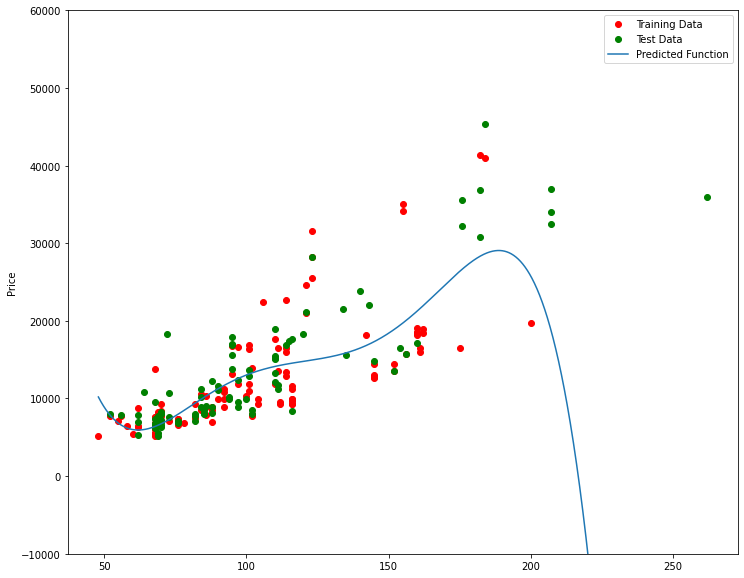

In [140]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Vemos que la función estimada parece rastrear los datos, pero alrededor de 200 caballos de fuerza, la función comienza a divergir de los puntos de datos.

Figura 4 Un modelo de regresión polinómica, los puntos rojos representan datos de entrenamiento, los puntos verdes representan datos de prueba y la línea azul representa la predicción del modelo.

R ^ 2 de los datos de entrenamiento:

In [141]:
poly.score(x_train_pr, y_train)

0.556771690212023

R ^ 2 de los datos de prueba:

In [142]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Vemos que el R ^ 2 para los datos de entrenamiento es 0.5567 mientras que el R ^ 2 en los datos de prueba fue -29.87. Cuanto más bajo es el R ^ 2, peor es el modelo, un R ^ 2 negativo es un signo de sobreajuste.

Veamos cómo cambia R ^ 2 en los datos de prueba para diferentes polinomios de orden y graficamos los resultados:

Text(3, 0.75, 'Maximum R^2 ')

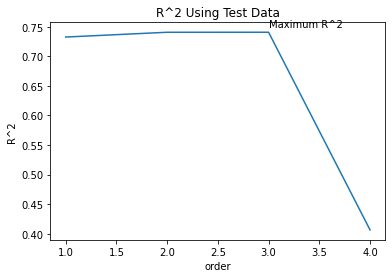

In [143]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Vemos que el R ^ 2 aumenta gradualmente hasta que se usa un orden de tres polinomios. Entonces el R ^ 2 disminuye dramáticamente a las cuatro.

La siguiente función se utilizará en la siguiente sección; Por favor, ejecute la celda.

In [144]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [169]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Ejercicio
Podemos realizar transformaciones polinómicas con más de una característica. ¿Crear un objeto "PolynomialFeatures" "pr1" de grado dos?

In [146]:
pr1=PolynomialFeatures(degree=2)

Transforme las muestras de entrenamiento y prueba para las características 'caballos de fuerza', 'peso en vacío', 'tamaño del motor' y 'mpg en carretera'. Sugerencia: ¿utiliza el método "fit_transform"?

In [147]:
x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

¿Cuántas dimensiones tiene la nueva característica? Sugerencia: use el atributo "shape"

There are now 15 features: x_train_pr1.shape 

¿Crear un modelo de regresión lineal "poly1" y entrenar el objeto usando el método "fit" usando las características polinómicas?

poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)

Utilice el método "predecir" para predecir una salida en las características polinómicas, luego use la función "Distribución de parcelas" para mostrar la distribución de la salida predicha frente a los datos de prueba.

yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


Use la gráfica de distribución para determinar las dos regiones donde los precios predichos son menos precisos que los precios reales.

## Parte 3: Regresión de cresta

En esta sección, revisaremos la Regresión de cresta y veremos cómo el parámetro Alfa cambia el modelo. Solo una nota aquí nuestros datos de prueba se utilizarán como datos de validación.

Realicemos una transformación polinómica de grado dos en nuestros datos.

In [151]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Importemos **Ridge** de los **modelos lineales** del módulo.

In [152]:
from sklearn.linear_model import Ridge

Creemos un objeto de regresión Ridge, estableciendo el parámetro de regularización en 0.1

In [153]:
RigeModel=Ridge(alpha=0.1)

Al igual que la regresión regular, puede ajustar el modelo utilizando el método de ajuste.

In [154]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

Del mismo modo, puede obtener una predicción:

In [155]:
yhat = RigeModel.predict(x_test_pr)

Comparemos las primeras cinco muestras predichas con nuestro conjunto de pruebas.

In [156]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


Seleccionamos el valor de Alfa que minimiza el error de prueba, por ejemplo, podemos usar un bucle for.

In [157]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Podemos trazar el valor de R ^ 2 para diferentes alfa

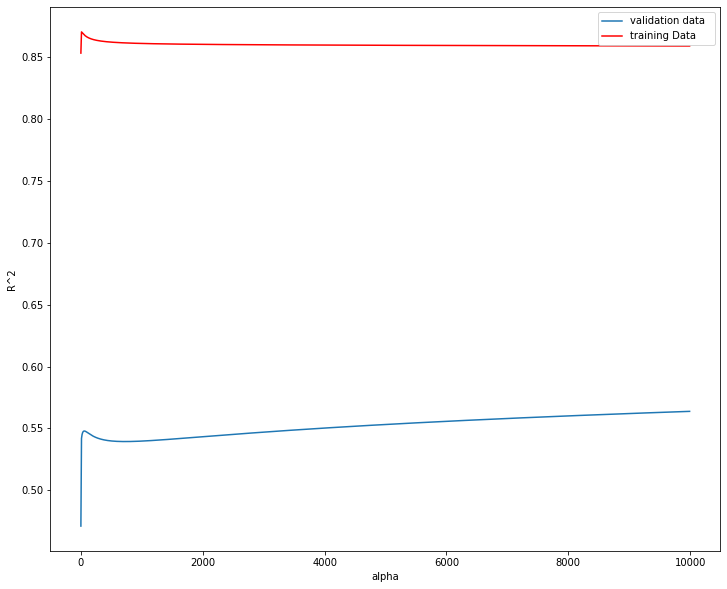

In [159]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figura 6: La línea azul representa el R ^ 2 de los datos de prueba y la línea roja representa el R ^ 2 de los datos de entrenamiento. El eje x representa los diferentes valores de Alfa

La línea roja en la figura 6 representa el R ^ 2 de los datos de prueba, a medida que Alpha aumenta, el R ^ 2 disminuye; por lo tanto, a medida que Alfa aumenta, el modelo funciona peor en los datos de prueba. La línea azul representa el R ^ 2 en los datos de validación, a medida que el valor de Alfa aumenta, el R ^ 2 disminuye.

In [ ]:
Ejercicio

Realice la regresión de Ridge y calcule el R ^ 2 utilizando las características polinómicas, use los datos de entrenamiento para entrenar el modelo y los datos de prueba para probar el modelo. El parámetro alfa debe establecerse en 10.

In [160]:
RigeModel = Ridge(alpha=0) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.470983330635111

## Parte 4: Búsqueda de cuadrícula
El término Alfa es un hiperparámetro, sklearn tiene la clase **GridSearchCV** para simplificar el proceso de búsqueda del mejor hiperparámetro.

Importemos **GridSearchC** desde el módulo `model_selection.`

In [161]:
from sklearn.model_selection import GridSearchCV

Creamos un diccionario de valores de parámetros:

In [162]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Se crea un Objeto tipo Ridge

In [163]:
RR=Ridge()
RR

Ridge()

Crear un objeto de búsqueda de cuadrícula de cresta

In [164]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Ajustar el modelo

In [165]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

El objeto encuentra los mejores valores de parámetro en los datos de validación. Podemos obtener el estimador con los mejores parámetros y asignarlo a la variable BestRR de la siguiente manera

In [166]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Ahora probamos nuestro modelo en los datos de prueba

In [167]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

Ejercicio
Realice una búsqueda de cuadrícula para el parámetro alfa y el parámetro de normalización, luego encuentre los mejores valores de los parámetros

In [168]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)